In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv("Train_data.csv")
data_test = pd.read_csv("Test_data.csv")

In [3]:
data = pd.concat([data_train,data_test])

In [4]:
data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
data.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
1801,0,tcp,http,SF,262,585,0,0,0,0,...,154,1.00,0.00,0.04,0.02,0.04,0.71,0.0,0.0,NaN
16374,0,tcp,http,SF,224,1645,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.00,0.00,0.0,0.0,normal
8163,0,udp,private,SF,54,51,0,0,0,0,...,255,1.00,0.00,0.97,0.00,0.00,0.00,0.0,0.0,NaN
1981,0,tcp,private,REJ,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.00,0.00,0.00,1.0,1.0,NaN
2365,0,icmp,eco_i,SF,64,0,0,0,0,0,...,1,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,NaN


In [6]:
display(data_train.shape)
display(data_test.shape)

(25192, 42)

(22544, 41)

In [7]:
data.shape

(47736, 42)

In [8]:
data.iloc[:,:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47736 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     47736 non-null  int64  
 1   protocol_type                47736 non-null  object 
 2   service                      47736 non-null  object 
 3   flag                         47736 non-null  object 
 4   src_bytes                    47736 non-null  int64  
 5   dst_bytes                    47736 non-null  int64  
 6   land                         47736 non-null  int64  
 7   wrong_fragment               47736 non-null  int64  
 8   urgent                       47736 non-null  int64  
 9   hot                          47736 non-null  int64  
 10  num_failed_logins            47736 non-null  int64  
 11  logged_in                    47736 non-null  int64  
 12  num_compromised              47736 non-null  int64  
 13  root_shell      

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,47736.0,264.347285,2.178506e+03,0.0,0.00,0.00,0.00,57715.0
src_bytes,47736.0,17749.543657,1.781220e+06,0.0,0.00,45.00,284.00,381709090.0
dst_bytes,47736.0,2813.756955,6.616178e+04,0.0,0.00,36.00,599.00,5151385.0
land,47736.0,0.000189,1.372973e-02,0.0,0.00,0.00,0.00,1.0
wrong_fragment,47736.0,0.016507,2.130641e-01,0.0,0.00,0.00,0.00,3.0
urgent,47736.0,0.000356,2.548121e-02,0.0,0.00,0.00,0.00,3.0
hot,47736.0,0.154286,1.690612e+00,0.0,0.00,0.00,0.00,101.0
num_failed_logins,47736.0,0.010851,1.089269e-01,0.0,0.00,0.00,0.00,4.0
logged_in,47736.0,0.417169,4.930965e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,47736.0,0.176869,9.068051e+00,0.0,0.00,0.00,0.00,884.0


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data_train.select_dtypes(include = ["object"]).columns.to_list():
    data_train[col] = label_encoder.fit_transform(data_train[col])

display(data_train.sample(2))

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
7225,0,1,22,9,330,2445,0,0,0,0,...,255,1.0,0.0,0.01,0.02,0.01,0.0,0.0,0.0,1
21824,0,1,22,9,292,8258,0,0,0,0,...,255,1.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder_test = LabelEncoder()

for col in data_test.select_dtypes(include = ["object"]).columns.to_list():
    data_test[col] = label_encoder_test.fit_transform(data_test[col])

display(data_test.sample(2))

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7676,0,1,49,9,1761,413,0,0,0,0,...,120,192,0.9,0.03,0.01,0.01,0.00,0.00,0.02,0.02
16591,0,1,22,9,236,431,0,0,0,0,...,9,154,1.0,0.00,0.11,0.02,0.11,0.81,0.00,0.00


### EDA 

In [12]:
# num_train_col = data_train.select_dtypes(include=["number"]).columns.tolist()
# data_train[num_train_col] = data_train[num_train_col].astype('int64')
# num_cols = len(num_train_col)

# fig, ax = plt.subplots(8, 4, figsize=(20, 60))
# ax = ax.flatten()

# for i, col in enumerate(num_train_col):
#     sns.regplot(x=data_train[col], y=data_train['class'], ax=ax[i])
    
# plt.tight_layout()
# plt.show()

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# num_train_col = data_train.select_dtypes(include=["number"]).columns.tolist()
# data_train[num_train_col] = data_train[num_train_col].astype('int64')
# num_cols = len(num_train_col)

# for col in num_train_col:
#     sns.kdeplot(data_train[col])
#     plt.title(col)
#     plt.show()


In [14]:
# sns.pairplot(data_train)

In [15]:
label_encoder = LabelEncoder()

for col in data.select_dtypes(include = ["object"]).columns.to_list():
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.12134467, -0.14875349, -0.75046077, ..., -0.50149325,
        -0.34824123, -0.46729304],
       [-0.12134467,  2.27145662,  0.67659363, ..., -0.50149325,
        -0.49051214, -0.46729304],
       [-0.12134467, -0.14875349,  1.00092418, ...,  2.07501952,
        -0.49051214, -0.46729304],
       ...,
       [-0.12134467, -0.14875349, -0.55586244, ..., -0.50149325,
        -0.29133287, -0.27457571],
       [-0.12134467,  2.27145662, -1.26938964, ..., -0.50149325,
        -0.49051214, -0.46729304],
       [-0.12134467, -0.14875349,  1.51985305, ..., -0.50149325,
         0.7614718 ,  2.28581165]])

### Training data preparation

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform the data
X_lda = lda.fit_transform(data.iloc[:25192, :-1], data.iloc[:25192, -1])
y_train = data.iloc[:25192, -1]
# Check the shape of the transformed data
print("Shape of transformed data:", X_lda.shape)


Shape of transformed data: (25192, 1)


In [20]:
const = np.ones(25192)

# Neural Networks

In [21]:
X_lda_1d = X_lda.flatten()
x_mat = np.array([const,X_lda.flatten()]).T

In [22]:
x_mat

array([[ 1.        ,  1.70764124],
       [ 1.        , -1.1411799 ],
       [ 1.        , -3.03087817],
       ...,
       [ 1.        , -2.47217118],
       [ 1.        , -2.8763109 ],
       [ 1.        , -2.47748352]])

In [23]:
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y_train)

array([0.53385996, 0.18165407])

## Optimizing Weights using Gradient descent

In [24]:
learning_rate = 1e-3
num_iter = 2500
theta_initial = np.array([1, 1])
num_obs = 25192
##########################################

b = 1
theta_1 = 1


In [25]:
y_pred = np.dot(theta_initial.T,x_mat.T)
y_pred

array([ 2.70764124, -0.1411799 , -2.03087817, ..., -1.47217118,
       -1.8763109 , -1.47748352])

In [26]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    theta_path = np.zeros((num_iter+1,2))
    theta_path[0,:]= theta_initial

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y_train-y_pred)**2)
        grad_vec = (y_train-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]= theta
    return theta_path, loss_vec

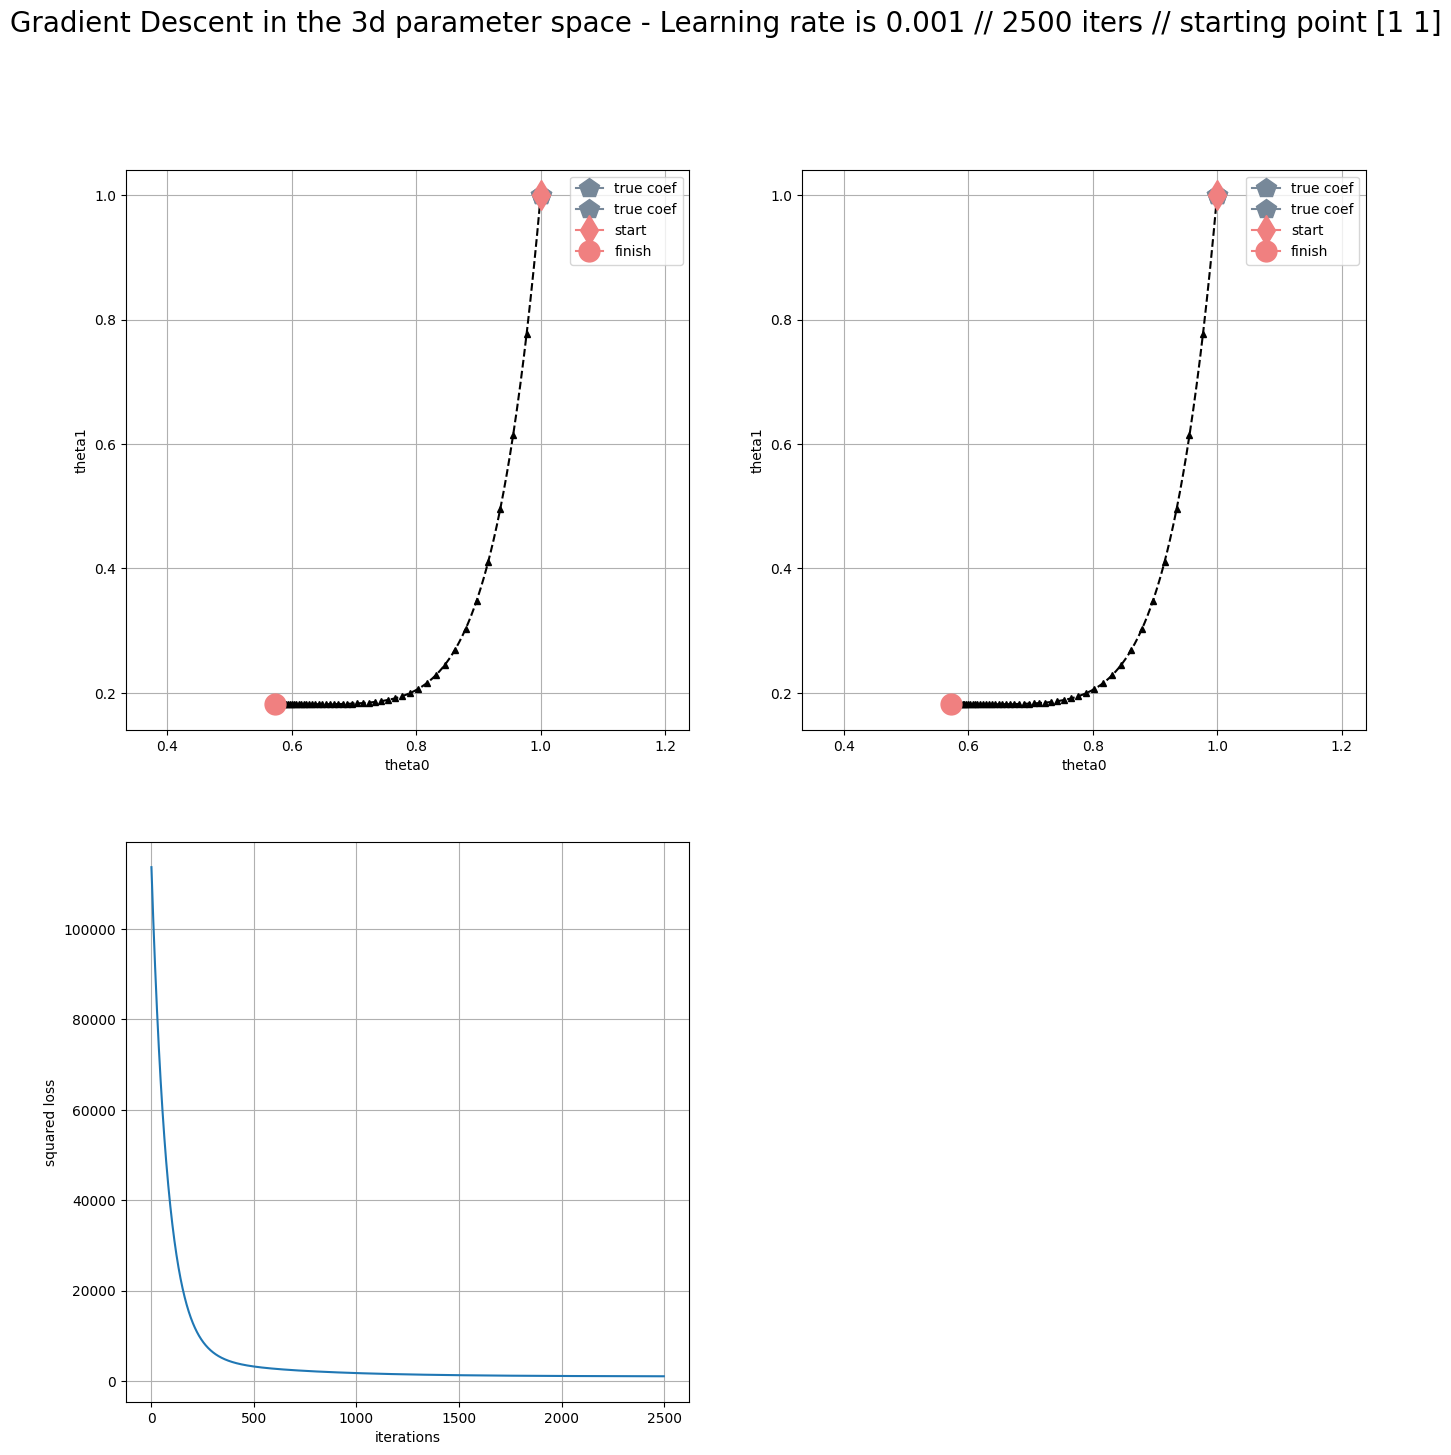

In [27]:
true_coef = [b, theta_1]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 3)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)



In [28]:
theta_path[-1]

array([0.57207523, 0.18165417])

In [29]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [30]:
model_1 = Sequential()
model_1.add(Dense(16,input_shape = (41,),activation = 'sigmoid'))
model_1.add(Dense(16,activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                672       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(data.iloc[:25192-1500,:-1],
                         data.iloc[:25192-1500,-1],
                         validation_data=(data.iloc[25192-1500:,:-1],
                                          data.iloc[25192-1500:,-1]),
                         epochs=50)


Epoch 1/50



741/741 [==============================] - 8s 9ms/step - loss: 0.5741 - accuracy: 0.8225 - val_loss: 0.4271 - val_accuracy: 0.0562
Epoch 2/50
741/741 [==============================] - 6s 8ms/step - loss: 0.3603 - accuracy: 0.8996 - val_loss: 0.2945 - val_accuracy: 0.0569
Epoch 3/50
741/741 [==============================] - 6s 8ms/step - loss: 0.2541 - accuracy: 0.9114 - val_loss: 0.4121 - val_accuracy: 0.0576
Epoch 4/50
741/741 [==============================] - 6s 8ms/step - loss: 0.2099 - accuracy: 0.9201 - val_loss: 0.5368 - val_accuracy: 0.0582
Epoch 5/50
741/741 [==============================] - 6s 7ms/step - loss: 0.1882 - accuracy: 0.9357 - val_loss: 0.8891 - val_accuracy: 0.0592
Epoch 6/50
741/741 [==============================] - 6s 8ms/step - loss: 0.1826 - accuracy: 0.9438 - val_loss: 0.6767 - val_accuracy: 0.0595
Epoch 7/50
741/741 [==============================] - 6s 8ms/step - loss: 0.1636 - accuracy: 0.9487 - val_loss: 0.7272 - val_accuracy: 0.0595
Epoch 8/50
741/74

In [33]:
# from sklearn.metrics import classification_report
# report = classification_report(data.iloc[:25192,-1], y_pred_class_nn_1.flatten())
# print(report)

In [34]:
y_pred_prob_nn_1 = model_1.predict(data.iloc[25192:,:-1])
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)


705/705 [==============================] - 3s 3ms/step


In [35]:
y_pred_prob_nn_1

array([[4.1742160e-04],
       [5.3347967e-04],
       [8.3919007e-01],
       ...,
       [8.3919007e-01],
       [9.9394584e-01],
       [8.4271589e-03]], dtype=float32)

In [36]:
binary_value = list(y_pred_class_nn_1.flatten())

In [37]:
data_test["Class"] = binary_value

In [38]:
binary_value_map = {1: "Normal", 0: "Anomaly"}
data_test["Class"] = data_test["Class"].map(binary_value_map)

In [39]:
data_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Anomaly
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,Anomaly
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,Normal
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,Anomaly
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,Normal
5,0,1,22,9,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,Normal
6,0,1,49,9,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,Normal
7,0,1,55,9,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,Normal
8,0,1,22,9,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,Normal
9,0,1,18,9,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,Normal
